In [1]:
import pandas as pd
import numpy as np
import calendar
from datetime import datetime
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

# plots
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

### Notebook para limpiar datos y generar Features

In [2]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

In [3]:
df_train.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [4]:
print('Cantidad nulos en Titulo:', df_train.titulo.isnull().sum())

Cantidad nulos en Titulo: 5387


In [5]:
print('Cantidad nulos en Descripcion:', df_train.descripcion.isnull().sum())

Cantidad nulos en Descripcion: 1619


In [6]:
print('Cantidad nulos en Tipo Propiedad:', df_train.tipodepropiedad.isnull().sum())
df_train.tipodepropiedad.value_counts()

Cantidad nulos en Tipo Propiedad: 46


Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Hospedaje                             1
Garage                                1
Name: tipodepropiedad, dtype: int64

In [7]:
print('Cantidad nulos en Ciudad:', df_train.ciudad.isnull().sum())
df_train.ciudad.value_counts()

Cantidad nulos en Ciudad: 372


Querétaro             12646
Benito Juárez         11014
Zapopan               10360
San Luis Potosí        7925
Mérida                 7162
                      ...  
Mazatepec                 1
Tetepango                 1
Ocotlán de Morelos        1
Chapantongo               1
Huautla de Jiménez        1
Name: ciudad, Length: 875, dtype: int64

In [8]:
print('Cantidad nulos en Provincia:', df_train.provincia.isnull().sum())
df_train.provincia.value_counts()

Cantidad nulos en Provincia: 155


Distrito Federal         58790
Edo. de México           41607
Jalisco                  21238
Querétaro                16988
Nuevo León               15324
Puebla                   10421
San luis Potosí           8447
Yucatán                   7928
Morelos                   7337
Veracruz                  5762
Quintana Roo              4756
Chihuahua                 4590
Coahuila                  3695
Baja California Norte     3220
Sonora                    2988
Guanajuato                2860
Guerrero                  2678
Hidalgo                   2521
Michoacán                 2471
Tamaulipas                2303
Durango                   2275
Sinaloa                   1806
Aguascalientes            1753
Baja California Sur       1700
Nayarit                   1352
Chiapas                   1126
Colima                    1008
Tabasco                    994
Tlaxcala                   839
Oaxaca                     711
Campeche                   263
Zacatecas                   94
Name: pr

In [9]:
print('Cantidad nulos en Habitaciones:', df_train.habitaciones.isnull().sum())
df_train.habitaciones.value_counts()

Cantidad nulos en Habitaciones: 22471


3.0     121887
2.0      57808
4.0      25068
1.0       5069
5.0       4596
6.0       1669
7.0        539
8.0        398
10.0       316
9.0        179
Name: habitaciones, dtype: int64

In [10]:
print('Cantidad nulos en Garages:', df_train.garages.isnull().sum())
df_train.garages.value_counts()

Cantidad nulos en Garages: 37765


2.0    94167
1.0    59464
0.0    26926
3.0    21678
Name: garages, dtype: int64

In [11]:
print('Cantidad nulos en Antiguedad:', df_train.antiguedad.isnull().sum())
df_train.antiguedad.value_counts()

Cantidad nulos en Antiguedad: 43555


0.0     50335
5.0     33268
10.0    28844
20.0    19904
1.0     12353
        ...  
61.0        2
76.0        2
71.0        1
77.0        1
64.0        1
Name: antiguedad, Length: 78, dtype: int64

In [12]:
print('Cantidad nulos en Baños:', df_train.banos.isnull().sum())
df_train.banos.value_counts()

Cantidad nulos en Baños: 26221


2.0    87683
1.0    58173
3.0    49365
4.0    18558
Name: banos, dtype: int64

In [13]:
print('Cantidad nulos en Metros Cubiertos:', df_train.metroscubiertos.isnull().sum())
df_train.metroscubiertos.value_counts()

Cantidad nulos en Metros Cubiertos: 17400


200.0    4984
120.0    4290
60.0     4217
90.0     4204
300.0    3920
         ... 
18.0       13
22.0       12
19.0       10
21.0        9
17.0        8
Name: metroscubiertos, Length: 425, dtype: int64

In [14]:
print('Cantidad nulos en Metros Totales:', df_train.metrostotales.isnull().sum())
df_train.metrostotales.value_counts()

Cantidad nulos en Metros Totales: 51467


90.0     7042
200.0    6957
160.0    6026
120.0    5687
300.0    4837
         ... 
18.0       14
21.0       14
17.0       13
23.0       10
19.0        8
Name: metrostotales, Length: 425, dtype: int64

In [15]:
print('Cantidad nulos en Gimnasio:', df_train.gimnasio.isnull().sum())
df_train.gimnasio.value_counts()

Cantidad nulos en Gimnasio: 0


0.0    225006
1.0     14994
Name: gimnasio, dtype: int64

In [16]:
print('Cantidad nulos en SUM:', df_train.usosmultiples.isnull().sum())
df_train.usosmultiples.value_counts()

Cantidad nulos en SUM: 0


0.0    226778
1.0     13222
Name: usosmultiples, dtype: int64

In [17]:
print('Cantidad nulos en Piscina:', df_train.piscina.isnull().sum())
df_train.piscina.value_counts()

Cantidad nulos en Piscina: 0


0.0    219028
1.0     20972
Name: piscina, dtype: int64

In [18]:
print('Cantidad nulos en Escuelas Cercanas:', df_train.escuelascercanas.isnull().sum())
df_train.escuelascercanas.value_counts()

Cantidad nulos en Escuelas Cercanas: 0


0.0    133406
1.0    106594
Name: escuelascercanas, dtype: int64

In [19]:
print('Cantidad nulos en Centros Comerciales Cercanos:', df_train.centroscomercialescercanos.isnull().sum())
df_train.centroscomercialescercanos.value_counts()

Cantidad nulos en Centros Comerciales Cercanos: 0


0.0    144832
1.0     95168
Name: centroscomercialescercanos, dtype: int64

In [20]:
print('Cantidad nulos en Fecha:', df_train.fecha.isnull().sum())

Cantidad nulos en Fecha: 0


In [21]:
df_test.isnull().sum()

id                                0
titulo                         1378
descripcion                     401
tipodepropiedad                   7
direccion                     13191
ciudad                           83
provincia                        42
antiguedad                    10714
habitaciones                   5628
garages                        9323
banos                          6554
metroscubiertos                4299
metrostotales                 12655
idzona                         7179
lat                           30695
lng                           30695
fecha                             0
gimnasio                          0
usosmultiples                     0
piscina                           0
escuelascercanas                  0
centroscomercialescercanos        0
dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------

### Reemplazo de Nulos

In [22]:
# Imputamos los NaNs
df_train['metroscubiertos'] = imp_mean.fit_transform(df_train[['metroscubiertos']])
df_test['metroscubiertos'] = imp_mean.transform(df_test[['metroscubiertos']])

In [23]:
# Imputamos los NaNs
df_train['metrostotales'] = imp_mean.fit_transform(df_train[['metrostotales']])
df_test['metrostotales'] = imp_mean.transform(df_test[['metrostotales']])

In [24]:
# Imputamos los NaNs
df_train['banos'] = imp_mean.fit_transform(df_train[['banos']])
df_test['banos'] = imp_mean.transform(df_test[['banos']])

In [25]:
# Imputamos los NaNs
df_train['antiguedad'] = imp_mean.fit_transform(df_train[['antiguedad']])
df_test['antiguedad'] = imp_mean.transform(df_test[['antiguedad']])

In [26]:
# Imputamos los NaNs
df_train['garages'] = imp_mean.fit_transform(df_train[['garages']])
df_test['garages'] = imp_mean.transform(df_test[['garages']])

In [27]:
# Imputamos los NaNs
df_train['habitaciones'] = imp_mean.fit_transform(df_train[['habitaciones']])
df_test['habitaciones'] = imp_mean.transform(df_test[['habitaciones']])

In [28]:
# Imputamos los Nulos
df_train['tipodepropiedad'].fillna("Sin datos", inplace = True)
df_test['tipodepropiedad'].fillna("Sin datos", inplace = True)

In [29]:
# Imputamos los Nulos
df_train['ciudad'].fillna("Sin datos", inplace = True)
df_test['ciudad'].fillna("Sin datos", inplace = True)

In [30]:
# Imputamos los Nulos
df_train['provincia'].fillna("Sin datos", inplace = True)
df_test['provincia'].fillna("Sin datos", inplace = True)

In [31]:
# Imputamos los Nulos
df_train['descripcion'].fillna("Sin datos", inplace = True)
df_test['descripcion'].fillna("Sin datos", inplace = True)

In [32]:
# Imputamos los Nulos
df_train['titulo'].fillna("Sin datos", inplace = True)
df_test['titulo'].fillna("Sin datos", inplace = True)

In [33]:
# Imputamos los Nulos
df_train['direccion'].fillna("Sin datos", inplace = True)
df_test['direccion'].fillna("Sin datos", inplace = True)

In [34]:
# Elimino caracteres que pueden modificar palabras y llevo todas las palabras a minuscular
import string 
char_invalidos = string.punctuation

char_fin_linea = ['\n', '\t', '\r']

def limpiar_cadena (cadena):
    cadena_valida = cadena
    for un_char in char_invalidos:
        cadena_valida = cadena_valida.replace(un_char, " ")
        
    for un_char in char_fin_linea:
        cadena_valida = cadena_valida.replace(un_char, " ")
        
    return cadena_valida.lower()

In [35]:
df_train['descripcion'] = df_train['descripcion'].apply(limpiar_cadena)
df_test['descripcion'] = df_test['descripcion'].apply(limpiar_cadena)

In [36]:
df_train['titulo'] = df_train['titulo'].apply(limpiar_cadena)
df_test['titulo'] = df_test['titulo'].apply(limpiar_cadena)

In [37]:
df_train['direccion'] = df_train['direccion'].apply(limpiar_cadena)
df_test['direccion'] = df_test['direccion'].apply(limpiar_cadena)

-------------------------------------------------------------------------------------------------------------------------------------

### Creación de nuevos Features

In [38]:
def relacion_entre_dos(numerador, denominador):
    if (denominador == 0):
        return 0
    return (numerador / denominador)

##### Cantidad total de Amenities

In [39]:
df_train['cantidad_amenities'] = df_train['gimnasio'] + df_train['usosmultiples'] + df_train['piscina']
df_test['cantidad_amenities'] = df_test['gimnasio'] + df_test['usosmultiples'] + df_test['piscina']

##### Cantidad total de Servicios (escuales/comercios cercanos)

In [40]:
df_train['cantidad_servicios'] = df_train['escuelascercanas'] + df_train['centroscomercialescercanos']
df_test['cantidad_servicios'] =  df_test['escuelascercanas'] + df_test['centroscomercialescercanos']

##### Relación entre Metros Cubiertos sobre Metros Totales

In [41]:
df_train['relacion_metros'] = df_train['metroscubiertos'] / df_train['metrostotales']
df_test['relacion_metros'] = df_test['metroscubiertos'] / df_test['metrostotales']

##### Metros Cuadrados Cubiertos por Habitación

In [42]:
df_train['metros_por_habitacion'] = df_train.metroscubiertos.combine(df_train.habitaciones, func=relacion_entre_dos)
df_test['metros_por_habitacion'] = df_test.metroscubiertos.combine(df_test.habitaciones, func=relacion_entre_dos)

##### Metros cuadrados cubiertos por Baño

In [43]:
df_train['metros_por_bano'] = df_train.metroscubiertos.combine(df_train.banos, func=relacion_entre_dos)
df_test['metros_por_bano'] = df_test.metroscubiertos.combine(df_test.banos, func=relacion_entre_dos)

##### Metros cuadrados por cantidad total de Amenities

In [44]:
df_train['metros_por_amenities'] = df_train.metroscubiertos.combine(df_train.cantidad_amenities, func=relacion_entre_dos)
df_test['metros_por_amenities'] = df_test.metroscubiertos.combine(df_test.cantidad_amenities, func=relacion_entre_dos)

##### Cantidad de Baños por habitación

In [45]:
df_train['bano_por_habitacion'] = df_train.banos.combine(df_train.habitaciones, func=relacion_entre_dos)
df_test['bano_por_habitacion'] = df_test.banos.combine(df_test.habitaciones, func=relacion_entre_dos)

##### Cantidad de Garages por habitación

In [46]:
df_train['garages_por_habitacion'] = df_train.garages.combine(df_train.habitaciones, func=relacion_entre_dos)
df_test['garages_por_habitacion'] = df_test.garages.combine(df_test.habitaciones, func=relacion_entre_dos)

#### Precio promedio según provincia

In [47]:
precio_promedio_por_provincia = df_train.groupby('provincia').agg({'precio':'mean'}).T.to_dict('list')

def obtener_precio_promedio_por_provincia(una_provincia):
    return precio_promedio_por_provincia[una_provincia][0]

#No sirve agregar feature de promedio provincial

##### Precio promedio según la ciudad

In [48]:
precio_promedio_por_ciudad = df_train.groupby('ciudad').agg({'precio':'mean', 'id': 'count',\
                                                             'provincia': lambda x: x.mode()[0]}).T.to_dict('list')
precio_promedio_general = df_train.precio.mean()
precio_promedio_por_ciudad

{'Abalá': [315000.0, 1, 'Yucatán'],
 'Abasolo': [2631016.6666666665, 6, 'Guanajuato'],
 'Abejones': [2500000.0, 1, 'Oaxaca'],
 'Acajete': [3089360.875, 8, 'Puebla'],
 'Acambay': [1575000.0, 8, 'Edo. de México'],
 'Acaponeta': [1103414.0, 1, 'Nayarit'],
 'Acapulco de Juárez': [2585813.164221679, 2454, 'Guerrero'],
 'Acateno': [1100000.0, 1, 'Puebla'],
 'Acatic': [1675000.0, 2, 'Jalisco'],
 'Acatzingo': [3122113.5, 2, 'Puebla'],
 'Acayucan': [394744.0, 2, 'Veracruz'],
 'Acolman': [930767.1232876712, 73, 'Edo. de México'],
 'Aconchi': [389500.0, 2, 'Sonora'],
 'Actopan': [1846754.1666666667, 12, 'Hidalgo'],
 'Acuitzio': [2300000.0, 1, 'Michoacán'],
 'Aculco': [2382000.0, 5, 'Edo. de México'],
 'Acuña': [2477500.0, 4, 'Coahuila'],
 'Agua Dulce': [750000.0, 1, 'Veracruz'],
 'Agua Prieta': [675875.75, 4, 'Sonora'],
 'Aguascalientes': [1545919.3746556474, 1452, 'Aguascalientes'],
 'Ahome': [1165801.3466666667, 150, 'Sinaloa'],
 'Ahuacatlán': [5525000.0, 2, 'Nayarit'],
 'Ahualulco': [2650000.0

In [49]:
#SI LA CIUDAD TIENE MENOS DE 10 VALUES EN EL DF, SE HACE EL PROMEDIO PROVINCIAL
#SI LA CIUDAD NO TIENE PROMEDIO PROVINCIAL, SE HACE PROMEDIO GENERAL

def obtener_provincia(una_ciudad):
    return precio_promedio_por_ciudad[una_ciudad][2]

def obtener_precio_promedio_por_ciudad(una_ciudad):
    if una_ciudad in precio_promedio_por_ciudad:
        if precio_promedio_por_ciudad[una_ciudad][1] > 10:
            return precio_promedio_por_ciudad[una_ciudad][0]
        return precio_promedio_por_provincia[obtener_provincia(una_ciudad)][0]
    return precio_promedio_general

In [50]:
df_train['precio_prom_ciudad'] = df_train['ciudad'].apply(obtener_precio_promedio_por_ciudad)
df_test['precio_prom_ciudad'] = df_test['ciudad'].apply(obtener_precio_promedio_por_ciudad)

##### Precio promedio según tipo de propiedad

In [51]:
precio_promedio_por_propiedad = df_train.groupby('tipodepropiedad').agg({'precio':'mean'}).T.to_dict('list')
precio_promedio_por_propiedad

{'Apartamento': [2763768.662248653],
 'Bodega comercial': [2693757.698435277],
 'Casa': [2398157.709865436],
 'Casa en condominio': [2898927.041819972],
 'Casa uso de suelo': [3732469.22740113],
 'Departamento Compartido': [2560161.8936170214],
 'Duplex': [1271757.973760933],
 'Edificio': [5009499.372492837],
 'Garage': [500000.0],
 'Hospedaje': [3000000.0],
 'Huerta': [3543350.0],
 'Inmuebles productivos urbanos': [3743070.11],
 'Local Comercial': [2365064.1610474633],
 'Local en centro comercial': [2212631.1272727274],
 'Lote': [988760.8],
 'Nave industrial': [3742600.0],
 'Oficina comercial': [3148532.746122918],
 'Otros': [2881688.8582089553],
 'Quinta Vacacional': [3187426.4607594935],
 'Rancho': [4032681.505882353],
 'Sin datos': [2249819.847826087],
 'Terreno': [1805201.8043237808],
 'Terreno comercial': [2472024.5859728507],
 'Terreno industrial': [3647994.4516129033],
 'Villa': [2767351.761764706]}

In [52]:
def obtener_precio_promedio_por_propiedad(un_tipo_propiedad):
    if un_tipo_propiedad in precio_promedio_por_propiedad:
        return precio_promedio_por_propiedad[un_tipo_propiedad][0]
    return precio_promedio_general

In [53]:
df_train['precio_prom_propiedad'] = df_train['tipodepropiedad'].apply(obtener_precio_promedio_por_propiedad)
df_test['precio_prom_propiedad'] = df_test['tipodepropiedad'].apply(obtener_precio_promedio_por_propiedad)

##### Pertenece al TOP5 de Provincias más caras

In [54]:
TOP5_provincias_caras = ['Distrito Federal', 'Edo. de México', 'Nuevo León', 'Guerrero', 'Quintana Roo']

def es_provincia_top5 (ciudad):
    if (ciudad in TOP5_provincias_caras):
        return 1
    return 0

In [55]:
df_train['provincia_top5'] = df_train['provincia'].apply(es_provincia_top5)
df_test['provincia_top5'] = df_test['provincia'].apply(es_provincia_top5)

##### Palabras en descripcion y titulo

In [56]:
lst_palabras_seguridad = ['seguridad', 'seguro', 'tranquilidad', 'tranquilo', 'paz']
lst_palabras_moderno = ['modernas', 'modernos', 'moderna', 'moderno', 'modernidad']
lst_palabras_hermoso = ['hermoso', 'hermosa', 'hermosos', 'hermosas', 'lindo', 'linda', 'lindos', 'lindas', 'bello', 'bella', 'bellos', 'bellas']
lst_palabras_estado = ['excelente', 'excelentes', 'residencial', 'confort']

In [57]:
def contar_cantidad_palabras (cadena, lst_palabras_a_buscar):
    cantidad_palabras = 0
    for una_palabra in cadena.split():
        if una_palabra in lst_palabras_a_buscar:
            cantidad_palabras += 1
    return cantidad_palabras

In [58]:
# PALABRAS EN DESCRIPCION
df_train['seguridad_descripcion'] = df_train['descripcion'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_seguridad))
df_test['seguridad_descripcion'] = df_test['descripcion'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_seguridad))

df_train['moderno_descripcion'] = df_train['descripcion'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_moderno))
df_test['moderno_descripcion'] = df_test['descripcion'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_moderno))

df_train['hermoso_descripcion'] = df_train['descripcion'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_hermoso))
df_test['hermoso_descripcion'] = df_test['descripcion'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_hermoso))

df_train['estado_descripcion'] = df_train['descripcion'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_estado))
df_test['estado_descripcion'] = df_test['descripcion'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_estado))

In [59]:
# PALABRAS EN TITULO
df_train['seguridad_titulo'] = df_train['titulo'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_seguridad))
df_test['seguridad_titulo'] = df_test['titulo'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_seguridad))

df_train['moderno_titulo'] = df_train['titulo'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_moderno))
df_test['moderno_titulo'] = df_test['titulo'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_moderno))

df_train['hermoso_titulo'] = df_train['titulo'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_hermoso))
df_test['hermoso_titulo'] = df_test['titulo'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_hermoso))

df_train['estado_titulo'] = df_train['titulo'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_estado))
df_test['estado_titulo'] = df_test['titulo'].apply(lambda x: contar_cantidad_palabras(x, lst_palabras_estado))

In [60]:
def log_palabras (cantidad_palabras, cadena_completa):
    long_cadena = len(cadena_completa.split())
    if (long_cadena == 0):
        return 0
    return np.log((cantidad_palabras / long_cadena) + 1)

In [61]:
df_train['cantidad_palabras_descripcion'] = df_train['seguridad_descripcion'] + df_train['moderno_descripcion'] + \
                                            df_train['hermoso_descripcion'] + df_train['estado_descripcion']

df_test['cantidad_palabras_descripcion'] = df_test['seguridad_descripcion'] + df_test['moderno_descripcion'] + \
                                            df_test['hermoso_descripcion'] + df_test['estado_descripcion']

df_train['relacion_palabras_descripcion'] = df_train.cantidad_palabras_descripcion.combine(df_train.descripcion, func=log_palabras)
df_test['relacion_palabras_descripcion'] = df_test.cantidad_palabras_descripcion.combine(df_test.descripcion, func=log_palabras)

##### Es Avenida

In [62]:
lst_palabras_avenida = ['avenida', 'av', 'Av.', 'av.']

def direccion_es_avenida(direccion):
    for sinonimo_avenida in lst_palabras_avenida:
        if sinonimo_avenida in direccion.split():
            return 1
    return 0

In [63]:
df_train['es_avenida'] = df_train['direccion'].apply(direccion_es_avenida)
df_test['es_avenida'] = df_test['direccion'].apply(direccion_es_avenida)

##### Es Ciudad Capital

In [64]:
dic_estado_capital = {
    'Aguascalientes': 'Aguascalientes',
    'Baja California Norte': 'Mexicali',
    'Baja California Sur': 'La Paz',
    'Campeche': 'Campeche',
    'Chiapas': 'Tuxtla Gutiérrez',
    'Chihuahua': 'Chihuahua',
    'Coahuila': 'Saltillo',
    'Colima': 'Colima',
    'Distrito Federal': 'Ciudad de México',
    'Durango': 'Durango',
    'Edo. de México': 'Toluca',
    'Guanajuato': 'Guanajuato',
    'Guerrero': 'Chilpancingo de los Bravo',
    'Hidalgo': 'Pachuca',
    'Jalisco': 'Guadalajara',
    'Michoacán': 'Morelia',
    'Morelos': 'Cuernavaca', 
    'Nayarit': 'Tepic',
    'Nuevo León': 'Monterrey',
    'Oaxaca': 'Oaxaca de Juárez',
    'Puebla': 'Puebla',
    'Querétaro': 'Querétaro',
    'Quintana Roo': 'Chetumal',
    'San luis Potosí': 'San Luis Potosí',
    'Sinaloa': 'Culiacán',
    'Sonora': 'Hermosillo',
    'Tabasco': 'Villahermosa',
    'Tamaulipas': 'Ciudad Victoria',
    'Tlaxcala': 'Tlaxcala',
    'Veracruz': 'Xalapa',
    'Yucatán': 'Mérida',
    'Zacatecas': 'Zacatecas',
    'Sin datos': ''
}

In [65]:
def ciudad_es_capital_de_provincia(ciudad, provincia):
    if (ciudad == dic_estado_capital[provincia]):
        return 1
    return 0

In [66]:
df_train['es_ciudad_capital'] = df_train.ciudad.combine(df_train.provincia, func=ciudad_es_capital_de_provincia)
df_test['es_ciudad_capital'] = df_test.ciudad.combine(df_test.provincia, func=ciudad_es_capital_de_provincia)

##### TOP15 de Ciudades más turísticas

In [67]:
lst_top15_ciudades_turisticas = [
    'Ciudad de México', 'Rivera Maya', 'Cancún', 'Los Cabos', 'Guadalajara', 'Puerto Vallarta', 'Monterrey', 'Acapulco', 'Nuevo Vallarta',
    'Mazatlán', 'Puebla', 'Querétaro', 'Mérida', 'Veracruz', 'Ixtapa Zihuatanejo'
]

In [68]:
df_train['ciudad_turistica_top15'] = df_train['ciudad'].apply(lambda x: 1 if (x in lst_top15_ciudades_turisticas) else 0)
df_test['ciudad_turistica_top15'] = df_test['ciudad'].apply(lambda x: 1 if (x in lst_top15_ciudades_turisticas) else 0)

##### Mes y Año de publicación

In [69]:
df_train['fecha'] = pd.to_datetime(df_train['fecha'])
df_test['fecha'] = pd.to_datetime(df_test['fecha'])

df_train['anio'] = df_train['fecha'].dt.year
df_test['anio'] = df_test['fecha'].dt.year

df_train['mes'] = df_train['fecha'].dt.month
df_test['mes'] = df_test['fecha'].dt.month

In [70]:
df_train.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio', 'cantidad_amenities',
       'cantidad_servicios', 'relacion_metros', 'metros_por_habitacion',
       'metros_por_bano', 'metros_por_amenities', 'bano_por_habitacion',
       'garages_por_habitacion', 'precio_prom_ciudad', 'precio_prom_propiedad',
       'provincia_top5', 'seguridad_descripcion', 'moderno_descripcion',
       'hermoso_descripcion', 'estado_descripcion', 'seguridad_titulo',
       'moderno_titulo', 'hermoso_titulo', 'estado_titulo',
       'cantidad_palabras_descripcion', 'relacion_palabras_descripcion',
       'es_avenida', 'es_ciudad_capital', 'ciudad_turistica_top15', 'anio',
       'mes'],
      dtype='object')

### Eliminamos features repetidos y complejos

In [71]:
drop = ['titulo', 'descripcion', 'direccion', 'fecha']

df_train = df_train.drop(drop, axis=1)
df_test = df_test.drop(drop, axis=1)
df_train.head()

,id,tipodepropiedad,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,...,moderno_titulo,hermoso_titulo,estado_titulo,cantidad_palabras_descripcion,relacion_palabras_descripcion,es_avenida,es_ciudad_capital,ciudad_turistica_top15,anio,mes
0,254099,Apartamento,Benito Juárez,Distrito Federal,8.116114,2.0,1.0,2.0,80.0,80.0,...,0,0,0,0,0.000000,1,0,0,2015,8
1,53461,Casa en condominio,La Magdalena Contreras,Distrito Federal,10.000000,3.0,2.0,2.0,268.0,180.0,...,0,0,0,1,0.007968,1,0,0,2013,6
2,247984,Casa,Tonalá,Jalisco,5.000000,3.0,2.0,2.0,144.0,166.0,...,0,0,0,10,0.046957,0,0,0,2015,10
3,209067,Casa,Zinacantepec,Edo. de México,1.000000,2.0,1.0,1.0,63.0,67.0,...,0,0,0,0,0.000000,0,0,0,2012,3
4,185997,Apartamento,Zapopan,Jalisco,10.000000,2.0,1.0,1.0,95.0,95.0,...,0,0,0,1,0.074108,0,0,0,2016,6


### Aplicamos encodings a los features categoricos

In [72]:
import category_encoders as ce

cat_features = ['tipodepropiedad', 'ciudad', 'provincia']

cb_features = ['ciudad']
oh_features = ['tipodepropiedad', 'provincia']

#Elegimos un metodo de encode para estos features, y comentamos el resto de los metodos
#O elegimos distintos metodos dependiendo del feature

#### CatBoostEncoding

In [73]:
catb_enc = ce.CatBoostEncoder(cols=cat_features)
catb_enc.fit(df_train[cat_features], df_train['precio'])

df_train = df_train.join(catb_enc.transform(df_train[cat_features]).add_suffix('_cb'))
df_test = df_test.join(catb_enc.transform(df_test[cat_features]).add_suffix('_cb'))

#### One Hot Encoding

In [74]:
'''one_hot_enc = ce.OneHotEncoder()
one_hot_encoded = one_hot_enc.fit_transform(df_train[oh_features])

df_train = df_train.join(one_hot_encoded.add_suffix("_oh"))
df_test = df_test.join(one_hot_encoded.add_suffix("_oh"))'''

'one_hot_enc = ce.OneHotEncoder()\none_hot_encoded = one_hot_enc.fit_transform(df_train[oh_features])\n\ndf_train = df_train.join(one_hot_encoded.add_suffix("_oh"))\ndf_test = df_test.join(one_hot_encoded.add_suffix("_oh"))'

In [75]:
df_train.shape

(240000, 48)

In [76]:
df_test.shape

(60000, 47)

In [77]:
#Dropeamos los features con strings ya encodeados
#Dejamos los dataset listos para modelar

df_train = df_train.drop(cat_features, axis=1)
df_test = df_test.drop(cat_features, axis=1)

### Feature Selection

In [78]:
from catboost import CatBoostRegressor

feature_cols = df_train.columns.tolist()
feature_cols.remove('precio')

X = df_train[feature_cols]
y = df_train['precio']

CatBoost = CatBoostRegressor(loss_function='MAE')
CatBoost_fit = CatBoost.fit(X, y)

0:	learn: 1490623.6351114	total: 124ms	remaining: 2m 3s
1:	learn: 1464644.2155964	total: 196ms	remaining: 1m 37s
2:	learn: 1438194.4956888	total: 271ms	remaining: 1m 30s
3:	learn: 1412775.3313568	total: 345ms	remaining: 1m 25s
4:	learn: 1388994.3983020	total: 418ms	remaining: 1m 23s
5:	learn: 1366085.9684500	total: 493ms	remaining: 1m 21s
6:	learn: 1342224.6822400	total: 571ms	remaining: 1m 20s
7:	learn: 1320075.7408825	total: 649ms	remaining: 1m 20s
8:	learn: 1299053.0596747	total: 726ms	remaining: 1m 19s
9:	learn: 1278620.3756906	total: 805ms	remaining: 1m 19s
10:	learn: 1260042.3523330	total: 882ms	remaining: 1m 19s
11:	learn: 1240311.2314563	total: 969ms	remaining: 1m 19s
12:	learn: 1221907.1934299	total: 1.08s	remaining: 1m 21s
13:	learn: 1204512.2692505	total: 1.18s	remaining: 1m 23s
14:	learn: 1187676.1616967	total: 1.29s	remaining: 1m 24s
15:	learn: 1172237.7118893	total: 1.36s	remaining: 1m 23s
16:	learn: 1157157.7664097	total: 1.44s	remaining: 1m 23s
17:	learn: 1142714.469818

144:	learn: 733018.7886094	total: 12.6s	remaining: 1m 14s
145:	learn: 732522.1759213	total: 12.7s	remaining: 1m 14s
146:	learn: 732028.1281516	total: 12.8s	remaining: 1m 14s
147:	learn: 731537.1949775	total: 12.9s	remaining: 1m 14s
148:	learn: 731052.3349644	total: 12.9s	remaining: 1m 13s
149:	learn: 730283.1130397	total: 13s	remaining: 1m 13s
150:	learn: 729866.7684687	total: 13.1s	remaining: 1m 13s
151:	learn: 729489.2591977	total: 13.2s	remaining: 1m 13s
152:	learn: 728363.6843715	total: 13.3s	remaining: 1m 13s
153:	learn: 727347.9395241	total: 13.4s	remaining: 1m 13s
154:	learn: 726970.6325126	total: 13.5s	remaining: 1m 13s
155:	learn: 726472.6017660	total: 13.6s	remaining: 1m 13s
156:	learn: 725869.4783302	total: 13.7s	remaining: 1m 13s
157:	learn: 724994.8017632	total: 13.8s	remaining: 1m 13s
158:	learn: 724747.1836087	total: 13.9s	remaining: 1m 13s
159:	learn: 724366.6168878	total: 14s	remaining: 1m 13s
160:	learn: 723935.8512179	total: 14.1s	remaining: 1m 13s
161:	learn: 723126

289:	learn: 680117.1598484	total: 25.7s	remaining: 1m 2s
290:	learn: 679929.2127059	total: 25.8s	remaining: 1m 2s
291:	learn: 679511.4319700	total: 25.9s	remaining: 1m 2s
292:	learn: 679224.7717531	total: 26s	remaining: 1m 2s
293:	learn: 679007.3816840	total: 26s	remaining: 1m 2s
294:	learn: 678726.3365252	total: 26.1s	remaining: 1m 2s
295:	learn: 678547.1834506	total: 26.2s	remaining: 1m 2s
296:	learn: 678453.0440344	total: 26.3s	remaining: 1m 2s
297:	learn: 678161.3621396	total: 26.3s	remaining: 1m 2s
298:	learn: 677958.2043450	total: 26.4s	remaining: 1m 1s
299:	learn: 677616.0414852	total: 26.5s	remaining: 1m 1s
300:	learn: 677346.5464001	total: 26.6s	remaining: 1m 1s
301:	learn: 677306.4658777	total: 26.7s	remaining: 1m 1s
302:	learn: 676988.7448478	total: 26.7s	remaining: 1m 1s
303:	learn: 676844.2880648	total: 26.8s	remaining: 1m 1s
304:	learn: 676259.6374970	total: 26.9s	remaining: 1m 1s
305:	learn: 675968.2583916	total: 27s	remaining: 1m 1s
306:	learn: 675810.0250943	total: 27.

435:	learn: 651259.4686337	total: 38s	remaining: 49.2s
436:	learn: 651132.7354998	total: 38.1s	remaining: 49.1s
437:	learn: 650945.6090473	total: 38.2s	remaining: 49s
438:	learn: 650881.8865008	total: 38.3s	remaining: 48.9s
439:	learn: 650742.5891291	total: 38.4s	remaining: 48.8s
440:	learn: 650666.0773281	total: 38.4s	remaining: 48.7s
441:	learn: 650429.6672926	total: 38.5s	remaining: 48.6s
442:	learn: 650303.8737440	total: 38.6s	remaining: 48.5s
443:	learn: 650200.4504159	total: 38.7s	remaining: 48.4s
444:	learn: 650104.0270791	total: 38.7s	remaining: 48.3s
445:	learn: 650051.7702040	total: 38.8s	remaining: 48.2s
446:	learn: 649849.1911871	total: 38.9s	remaining: 48.1s
447:	learn: 649735.7950100	total: 39s	remaining: 48s
448:	learn: 649613.6357523	total: 39.1s	remaining: 47.9s
449:	learn: 649378.2472545	total: 39.1s	remaining: 47.8s
450:	learn: 649236.3343172	total: 39.2s	remaining: 47.7s
451:	learn: 649046.3897601	total: 39.3s	remaining: 47.6s
452:	learn: 648847.8181905	total: 39.4s

582:	learn: 632812.1284656	total: 49.8s	remaining: 35.6s
583:	learn: 632715.7151018	total: 49.9s	remaining: 35.5s
584:	learn: 632695.1951145	total: 50s	remaining: 35.5s
585:	learn: 632614.4563115	total: 50.1s	remaining: 35.4s
586:	learn: 632502.7869408	total: 50.1s	remaining: 35.3s
587:	learn: 632476.4186374	total: 50.2s	remaining: 35.2s
588:	learn: 632384.1143488	total: 50.3s	remaining: 35.1s
589:	learn: 632136.0773694	total: 50.4s	remaining: 35s
590:	learn: 631926.4109475	total: 50.5s	remaining: 34.9s
591:	learn: 631752.4537169	total: 50.5s	remaining: 34.8s
592:	learn: 631719.9040407	total: 50.6s	remaining: 34.7s
593:	learn: 631629.6613011	total: 50.7s	remaining: 34.7s
594:	learn: 631589.1245211	total: 50.8s	remaining: 34.6s
595:	learn: 631463.2474118	total: 50.9s	remaining: 34.5s
596:	learn: 631359.0351761	total: 50.9s	remaining: 34.4s
597:	learn: 631301.8360282	total: 51s	remaining: 34.3s
598:	learn: 631260.9299813	total: 51.1s	remaining: 34.2s
599:	learn: 631180.4507632	total: 51.

729:	learn: 619993.7879201	total: 1m 1s	remaining: 22.8s
730:	learn: 619920.8828728	total: 1m 1s	remaining: 22.8s
731:	learn: 619833.7554897	total: 1m 1s	remaining: 22.7s
732:	learn: 619738.5200478	total: 1m 2s	remaining: 22.6s
733:	learn: 619662.8798241	total: 1m 2s	remaining: 22.5s
734:	learn: 619583.1166343	total: 1m 2s	remaining: 22.5s
735:	learn: 619507.7599902	total: 1m 2s	remaining: 22.4s
736:	learn: 619421.7138834	total: 1m 2s	remaining: 22.3s
737:	learn: 619235.8850737	total: 1m 2s	remaining: 22.2s
738:	learn: 619104.3962177	total: 1m 2s	remaining: 22.1s
739:	learn: 619024.6817698	total: 1m 2s	remaining: 22.1s
740:	learn: 618935.4461534	total: 1m 2s	remaining: 22s
741:	learn: 618848.2384941	total: 1m 3s	remaining: 21.9s
742:	learn: 618805.3019324	total: 1m 3s	remaining: 21.8s
743:	learn: 618782.3834438	total: 1m 3s	remaining: 21.8s
744:	learn: 618691.6106248	total: 1m 3s	remaining: 21.7s
745:	learn: 618644.5091822	total: 1m 3s	remaining: 21.6s
746:	learn: 618573.5224006	total:

875:	learn: 610408.3252387	total: 1m 15s	remaining: 10.6s
876:	learn: 610366.0159775	total: 1m 15s	remaining: 10.6s
877:	learn: 610332.8347045	total: 1m 15s	remaining: 10.5s
878:	learn: 610298.8905686	total: 1m 15s	remaining: 10.4s
879:	learn: 610235.0001552	total: 1m 15s	remaining: 10.3s
880:	learn: 610187.3448379	total: 1m 15s	remaining: 10.2s
881:	learn: 610119.4448026	total: 1m 15s	remaining: 10.1s
882:	learn: 610097.5718985	total: 1m 15s	remaining: 10.1s
883:	learn: 609990.9031775	total: 1m 15s	remaining: 9.97s
884:	learn: 609960.0442909	total: 1m 16s	remaining: 9.88s
885:	learn: 609883.7369610	total: 1m 16s	remaining: 9.8s
886:	learn: 609838.3446502	total: 1m 16s	remaining: 9.71s
887:	learn: 609797.3461011	total: 1m 16s	remaining: 9.63s
888:	learn: 609730.0794387	total: 1m 16s	remaining: 9.54s
889:	learn: 609692.0337345	total: 1m 16s	remaining: 9.45s
890:	learn: 609637.2514789	total: 1m 16s	remaining: 9.37s
891:	learn: 609597.4819602	total: 1m 16s	remaining: 9.28s
892:	learn: 609

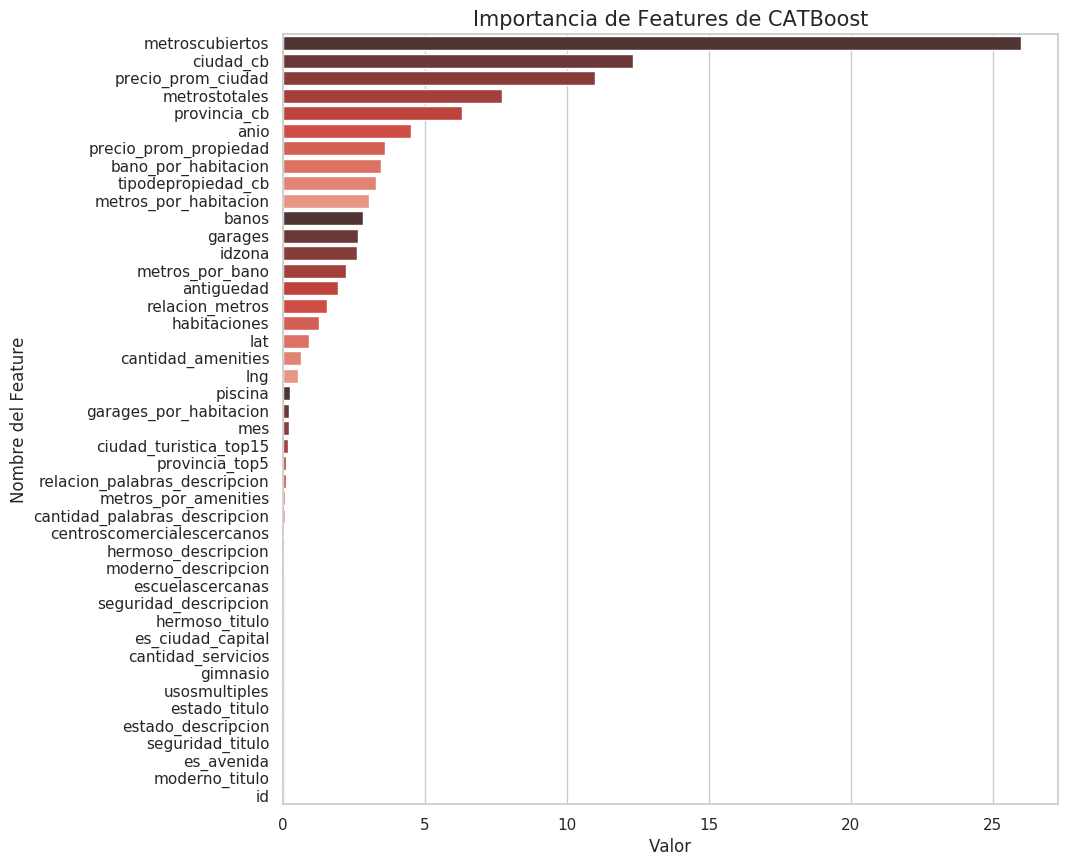

In [79]:
features = pd.DataFrame(index=feature_cols)
features['imp'] = CatBoost_fit.feature_importances_
features = features.sort_values(['imp'], ascending = False)

plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 10)
sns.set(style="whitegrid")

g = sns.barplot(y=features.index, x=features.imp, \
                palette=sns.color_palette("Reds_d", 10));

g.set_title('Importancia de Features de CATBoost', fontsize=15);
g.set_xlabel('Valor');
g.set_ylabel('Nombre del Feature');

In [80]:
k=40

features_to_drop = features.nsmallest((df_train.columns.size - k), 'imp').index.tolist()
if 'id' in features_to_drop: features_to_drop.remove('id')
features_to_drop

['es_avenida', 'moderno_titulo', 'seguridad_titulo', 'estado_descripcion']

In [81]:
#Dropeamos los features menos importantes
df_train = df_train.drop(features_to_drop, axis=1)
df_test = df_test.drop(features_to_drop, axis=1)

### Guardo Features generados

In [82]:
df_train.to_csv('../data/train_con_features_encoded.csv')
df_test.to_csv('../data/test_con_features_encoded.csv')